In [8]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
# Download historical data for required stocks
ticker = "GOOG"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [4]:
def MACD(DF,a,b,c):
    """function to calculate MACD
       typical values a = 12; b=26; c=9"""
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

In [6]:
# Visualization - plotting MACD/signal along with close price and volume for last 100 data points
df = MACD(ohlcv, 12, 26, 9)
df

,Open,High,Low,Close,Adj Close,Volume,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900,722.053901,719.432631,2.621269,3.610784
2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100,721.470079,719.340265,2.129814,3.278961
2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500,721.076795,719.307053,1.769742,2.948752
2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500,719.424638,718.603512,0.821126,2.491827
2016-06-17,708.650024,708.820007,688.452026,691.719971,691.719971,3402400,715.154909,716.499154,-1.344246,1.679981
...,...,...,...,...,...,...,...,...,...,...
2021-04-19,2291.979980,2318.449951,2287.844971,2302.399902,2302.399902,1234400,2243.772437,2179.021106,64.751331,54.522622
2021-04-20,2307.889893,2309.600098,2271.709961,2293.629883,2293.629883,1088700,2251.442813,2187.510645,63.932168,56.404531
2021-04-21,2285.250000,2295.320068,2258.570068,2293.290039,2293.290039,1196500,2257.880848,2195.346156,62.534692,57.630563


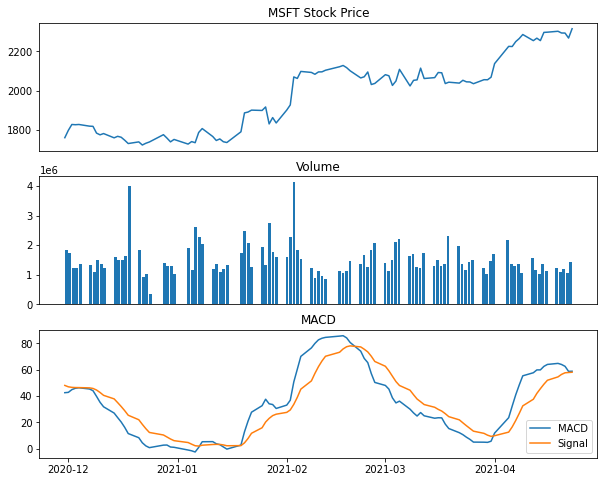

In [13]:
plt.subplot(311)
plt.plot(df.iloc[-100:,4])
plt.title('MSFT Stock Price')
plt.xticks([])

plt.subplot(312)
plt.bar(df.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Volume')
plt.xticks([])

plt.subplot(313)
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='lower right')

plt.show()

Text(0.5, 0.98, 'Stock Price with MACD')

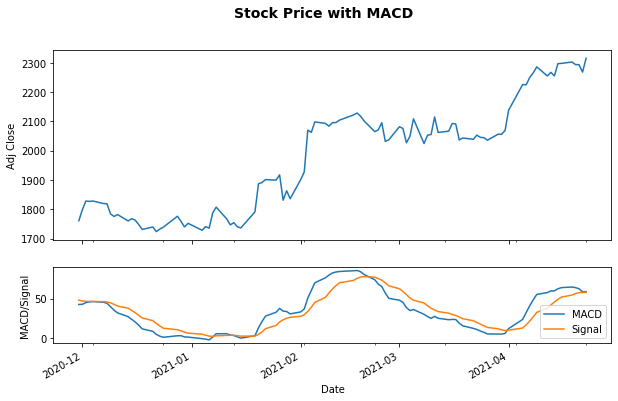

In [14]:
# Visualization - Using object orient approach
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2.5, 1]})
df.iloc[-100:,4].plot(ax=ax0)
ax0.set(ylabel='Adj Close')

df.iloc[-100:,[-2,-1]].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD/Signal')

# Title the figure
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')